In [1]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


# Question 1:
## Optimise the following function using torch autograd and gradient descent, f(θ) = (θ₀ - 2)² + (θ₁ - 3)². In addition to finding the optima, you need to show the convergence plots. [0.5 marks]

In [2]:
# Define the function
def f(theta):
    return (theta[0] - 2)**2 + (theta[1] - 3)**2


In [3]:

# Initialize the parameters (θ₀ and θ₁) and learning rate
theta = torch.tensor([ random.random() ,random.random()], requires_grad=True)
learning_rate = 0.1
num_iterations = 100
theta

tensor([0.4659, 0.0885], requires_grad=True)

In [4]:
loss_history = []
theta_history = []

for _ in range(num_iterations):
    loss = f(theta)
    # print(loss.item())
    loss_history.append(loss.item())
    theta_history.append(theta)
    # print(theta)
    loss.backward()  # Compute gradients
    with torch.no_grad():
        theta -= learning_rate * theta.grad  # Update parameters
        theta.grad.zero_()  # Reset gradients

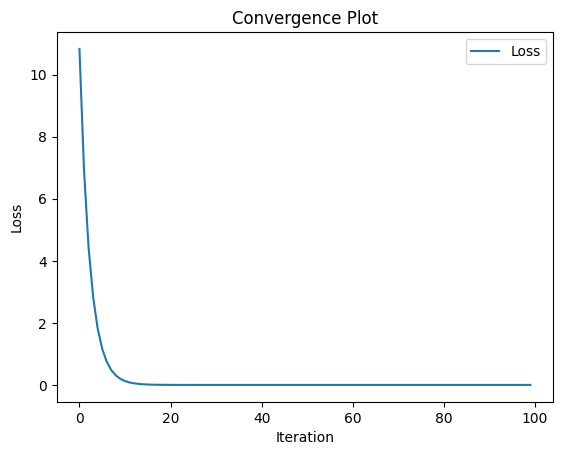

In [5]:
plt.plot(range(num_iterations), loss_history, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Plot')
plt.legend()
plt.show()

In [6]:
optimal_theta = theta.detach().numpy()
print("Optimal Parameters (θ₀, θ₁):", optimal_theta)
print("Optimal Value of f(θ):", f(optimal_theta))

Optimal Parameters (θ₀, θ₁): [1.9999998 2.9999995]
Optimal Value of f(θ): 2.8421709430404007e-13


# Question 2:
## Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. 
## a) Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]
## b) Find the MLE parameters for the loc and scale using gradient descent. Plot convergence plot as well. [1 mark]

## c) Redo the above question but learn log(scale) instead of scale and then finally transform to learn scale. What can you conclude? Why is this transformation useful? [0.5 mark]

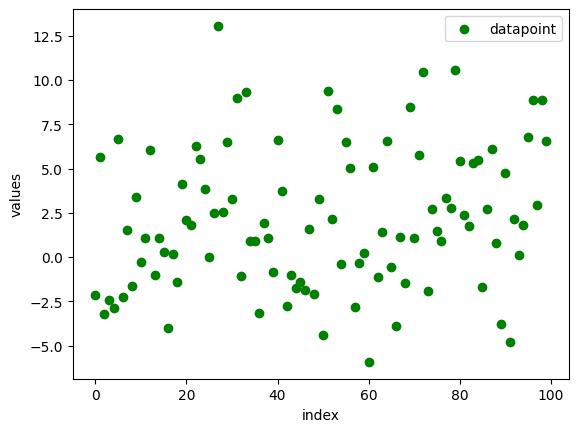

In [7]:
N = 100
torch.manual_seed(2)
samples = torch.distributions.Normal(2.0, 4.0).sample((N,))
samples
samples.mean(), samples.std(correction=0)
plt.scatter(range(N),samples,color='g',label='datapoint')
plt.xlabel('index')
plt.ylabel('values')
plt.legend();

In [8]:
#Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]
def ll(mu, sigma):
    mu = torch.tensor(mu)
    sigma = torch.tensor(sigma)
    dist = torch.distributions.Normal(mu, sigma)
    loglik = dist.log_prob(samples).sum()
    return dist, loglik
   

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_lls(mus, sigmas, lls):
    fig, ax1 = plt.subplots(figsize=(8, 6))
    
    X, Y = np.meshgrid(mus, sigmas)
    
    max_indices = np.unravel_index(np.argmax(lls), lls.shape)
    max_mu = mus[max_indices[1]]
    max_sigma = sigmas[max_indices[0]]
    max_loglik = lls[max_indices]

    # Define levels with increasing granularity
    levels_low = np.linspace(lls.min(), max_loglik, 20)
    levels_high = np.linspace(max_loglik + 0.001, lls.max(), 10)  # Adding a small value to prevent duplicates
    levels = levels_low
    
    # Plot the contour filled plot
    contour = ax1.contourf(X, Y, lls.T, levels=levels, cmap='magma')
    
    # Plot the contour lines
    contour_lines = ax1.contour(X, Y, lls.T, levels=levels, colors='black', linewidths=0.5, alpha=0.6)
    
    # Add contour labels
    ax1.clabel(contour_lines, inline=True, fontsize=10, colors='black', fmt='%1.2f')
    
    ax1.set_xlabel('Mu')
    ax1.set_ylabel('Sigma')
    ax1.set_title('Contour Plot of Log Likelihood')
    
    # Add maximum log likelihood point as scatter on the contour plot
    ax1.scatter([max_mu], [max_sigma], color='red', marker='o', label='Maximum Log Likelihood')
    ax1.annotate(f'Max LL: {max_loglik:.2f}', (max_mu, max_sigma), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

    ax1.axvline(max_mu, color='red', linestyle='--', alpha=0.5)
    ax1.axhline(max_sigma, color='red', linestyle='--', alpha=0.5)
    
    # Create colorbar outside the plot
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(contour, cax=cax)
    cbar.set_label('Log Likelihood', rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.show()



In [10]:
def get_lls(mus, sigmas):

    lls = torch.zeros((len(mus), len(sigmas)))
    for i, mu in enumerate(mus):
        for j, sigma in enumerate(sigmas):

            lls[i, j] = ll(mu, sigma)[1]
    return lls

/tmp/ipykernel_1005633/1013414350.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu = torch.tensor(mu)
/tmp/ipykernel_1005633/1013414350.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sigma = torch.tensor(sigma)


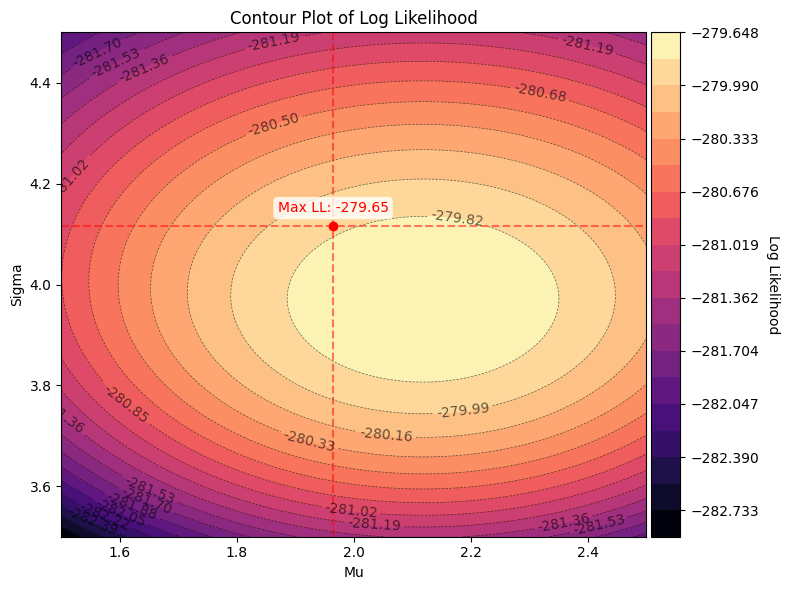

In [11]:
mus = torch.linspace(1.5, 2.5, 100)
sigmas = torch.linspace(3.5, 4.5,100)
lls = get_lls(mus, sigmas)
plot_lls(mus, sigmas, lls)

In [12]:
def ll_func(samples,loc,scale):
    y = (len(samples)/2)*torch.log(2*torch.pi*(scale**2)) + (1/(2*(scale**2)))*torch.sum((samples - loc)**2)
    return y

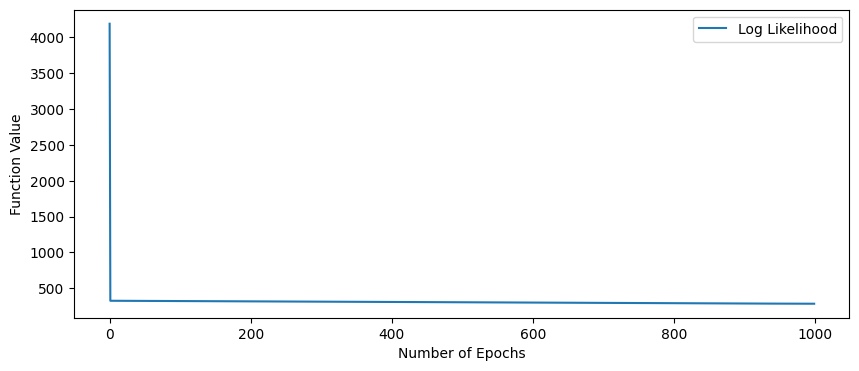

Estimated mu is:1.7240076065063477 and sigma is: 4.8394694328308105


In [13]:

loc = torch.tensor(random.random(), requires_grad=True)
scale = torch.tensor(random.random(), requires_grad=True)
# Gradient descent loop
n_epochs = 1000
optimizer = torch.optim.SGD([loc,scale], lr=0.0005)
out_list = []
for epoch_itr in range(n_epochs):
    optimizer.zero_grad()
    out = ll_func(samples,loc,scale)
    # print(loc,scale,out)
    out.backward()
    optimizer.step()
    out_list.append(out.detach().numpy())
    
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range(n_epochs),out_list,label="Log Likelihood")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Function Value")
ax.legend()
plt.show()

print(f"Estimated mu is:{loc.detach().numpy()} and sigma is: {scale.detach().numpy()}")

In [14]:
def ll_func_log_scale(samples,loc,log_scale):
    y = (len(samples)/2)*torch.log(2*math.pi*(torch.exp(log_scale)**2)) + (1/(2*(torch.exp(log_scale)**2)))*torch.sum((samples - loc)**2)
    return y

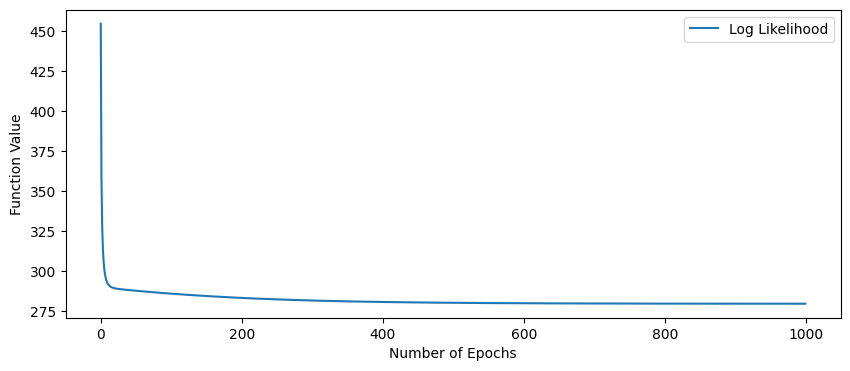

Estimated mu is:2.0297060012817383 and log(sigma) is: 1.3778060674667358


In [15]:

loc = torch.tensor(random.random(), requires_grad=True)
log_scale = torch.tensor(random.random(), requires_grad=True)
# Gradient descent loop
n_epochs = 1000
optimizer = torch.optim.SGD([loc,log_scale], lr=0.0005)
out_list = []
for epoch_itr in range(n_epochs):
    optimizer.zero_grad()
    out = ll_func_log_scale(samples,loc,log_scale)
    # print(loc,scale,out)
    out.backward()
    optimizer.step()
    out_list.append(out.detach().numpy())
    
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range(n_epochs),out_list,label="Log Likelihood")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Function Value")
ax.legend()
plt.show()

print(f"Estimated mu is:{loc.detach().numpy()} and log(sigma) is: {log_scale.detach().numpy()}")

In [16]:
print(f"Estimated sigma is {torch.exp(log_scale)}")

Estimated sigma is 3.9661905765533447


Conclusion: During the process of finding the Maximum Likelihood Estimation (MLE) parameters for the (loc) and scale using gradient descent, the parameters do not converge effectively, and their values cannot be consistently reproduced. However, when employing a Log scale, numerical stability is enhanced, resulting in consistent and reproducible values.
We understand that small values of sigma lead to gradients that result in such instability.

  

# Question 3:
## Generate some data (1000 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0 and using Student-T distributions with varying degrees (from 1-8) of freedom (1000 data points corresponding to each degree of freedom). Plot the pdf (and logpdf) at uniformly spaced data from (-50, 50) in steps of 0.1. What can you conclude? [1 mark]

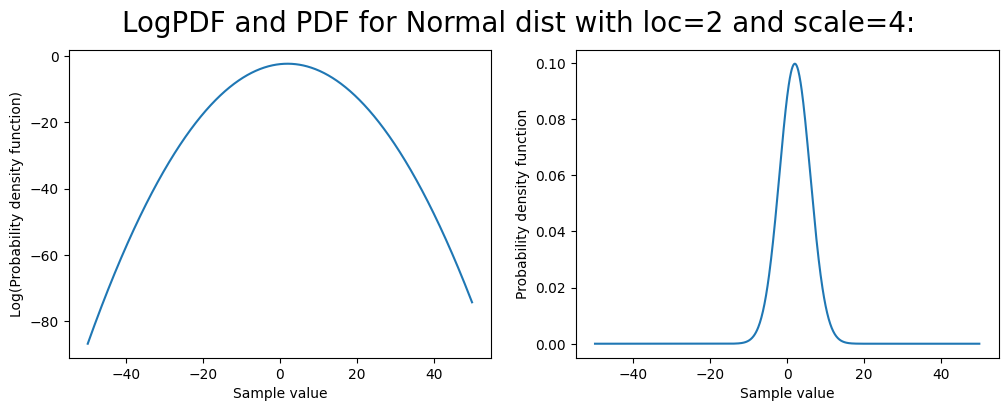

In [17]:
normal = torch.distributions.Normal(loc=2, scale=4)
samples = normal.sample((1000,))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
xs = torch.linspace(-50, 50,1001)
y_logpdf = normal.log_prob(xs)
y_pdf = normal.log_prob(xs).exp()
fig.suptitle(f'LogPDF and PDF for Normal dist with loc=2 and scale=4:', fontsize=20)
ax[0].plot(xs,y_logpdf)
ax[0].set_xlabel("Sample value")
ax[0].set_ylabel("Log(Probability density function)")
ax[1].plot(xs,y_pdf)
ax[1].set_xlabel("Sample value")
ax[1].set_ylabel("Probability density function")
plt.show()
# plt.scatter(samples, np.zeros_like(samples))

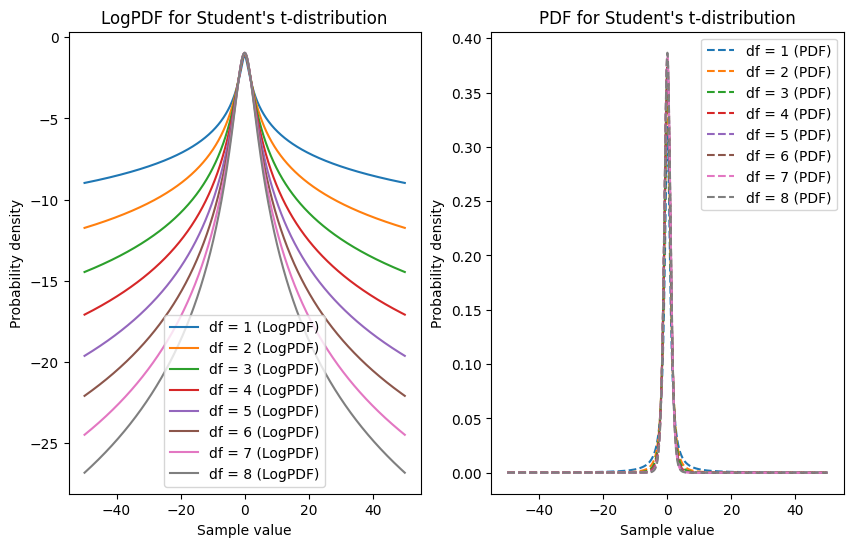

In [18]:
import torch
import matplotlib.pyplot as plt

# Create a range of degrees of freedom
dfs = range(1, 9)

fig, ax = plt.subplots(1,2,figsize=(10, 6))

for df in dfs:
    dist = torch.distributions.studentT.StudentT(df=df)
    xs = torch.linspace(-50, 50, 1001)
    y_logpdf = dist.log_prob(xs)
    y_pdf = y_logpdf.exp()

    ax[0].plot(xs, y_logpdf, label=f'df = {df} (LogPDF)')
    ax[0].set_title("LogPDF for Student's t-distribution")
    ax[0].set_xlabel("Sample value")
    ax[0].set_ylabel("Probability density")
    ax[0].legend()
    ax[1].plot(xs, y_pdf, linestyle='dashed', label=f'df = {df} (PDF)')
    ax[1].set_title("PDF for Student's t-distribution")
    ax[1].set_xlabel("Sample value")
    ax[1].set_ylabel("Probability density")
    ax[1].legend();


# Conclusion from the graphs



With increasing degrees of freedom, the pdf values are almost similar at the peaks and difficult to differentiate across DoF due to floating point precision. While the pdf values are zeroed for the samples at the tails due to underflow.
For logPDF values even at tails or near the peaks, values with varying DoF have significant differences and are not zeroed.

# Question 4
## Analytically derive the MLE for exponential distribution. Generate some data (1000 data points) using some fixed parameter values and see if you can recover the analytical parameters using gradient descent based solution for obtaining MLE. [1 mark]

To analytically derive the Maximum Likelihood Estimation (MLE) for the parameter of the exponential distribution, we'll assume that we have a dataset of independent and identically distributed (i.i.d.) samples: 
$x_1, x_2, \ldots, x_n$ is drawn from an exponential distribution with the probability density function (PDF):

$$
f(x|\lambda) = \begin{cases}
\lambda \cdot e^{-\lambda x} & \text{for } x \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

where $\lambda$ is the parameter we want to estimate.

The likelihood function for this dataset can be written as the product of the individual PDF values:
$$
L(\lambda) = \prod_{i=1}^{n} f(x_i|\lambda) = \prod_{i=1}^{n} \lambda \cdot e^{-\lambda x_i}
$$

To simplify calculations, it's often more convenient to work with the log-likelihood function:
$$
l(\lambda) = \log L(\lambda) = \sum_{i=1}^{n} \log(\lambda) - \lambda x_i
$$

Now, we aim to find the value of $\lambda$ that maximizes $l(\lambda)$. To do so, we take the derivative of $l(\lambda)$ with respect to $\lambda$, set it equal to zero, and solve for $\lambda$:
$$
\frac{d}{d\lambda} l(\lambda) = \sum_{i=1}^{n} \frac{1}{\lambda} - x_i = 0
$$

Solving for $\lambda$:
$$
\frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0
$$
$$
\lambda = \frac{n}{\sum_{i=1}^{n} x_i}
$$

So, the MLE for the parameter $\lambda$ of the exponential distribution, based on the given dataset, is:
$$
\hat{\lambda} = \frac{n}{\sum_{i=1}^{n} x_i}
$$

In [19]:
n_samples = 1000
exp_dist = torch.distributions.exponential.Exponential(rate=1)
samples = exp_dist.sample((n_samples,))

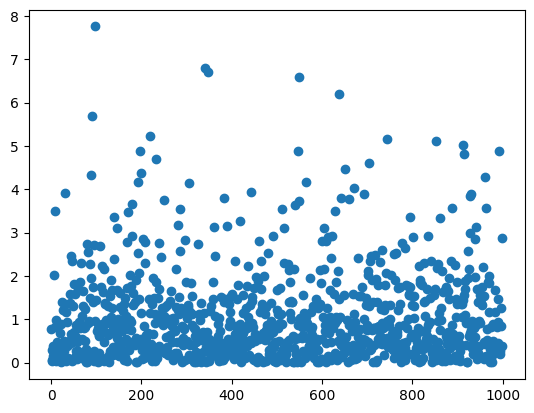

In [20]:
plt.scatter(range(n_samples),samples)

In [21]:
def func(x,log_rate):
    y = -log_rate + (torch.exp(log_rate)*x)
    return y

In [22]:
log_rate = torch.tensor(random.random(), requires_grad=True)
# Gradient descent loop
n_epochs = 200
optimizer = torch.optim.SGD([log_rate], lr=0.0001)
out_list = []
for epoch_itr in range(n_epochs):
    optimizer.zero_grad()
    out = torch.sum(func(samples,log_rate))
    print(log_rate,out)
    
    out.backward()
    optimizer.step()
    out_list.append(out.detach().numpy())

tensor(0.0033, requires_grad=True) tensor(1031.6007, grad_fn=<SumBackward0>)
tensor(-0.0002, requires_grad=True) tensor(1031.4854, grad_fn=<SumBackward0>)
tensor(-0.0033, requires_grad=True) tensor(1031.3925, grad_fn=<SumBackward0>)
tensor(-0.0061, requires_grad=True) tensor(1031.3179, grad_fn=<SumBackward0>)
tensor(-0.0087, requires_grad=True) tensor(1031.2576, grad_fn=<SumBackward0>)
tensor(-0.0109, requires_grad=True) tensor(1031.2091, grad_fn=<SumBackward0>)
tensor(-0.0129, requires_grad=True) tensor(1031.1702, grad_fn=<SumBackward0>)
tensor(-0.0148, requires_grad=True) tensor(1031.1385, grad_fn=<SumBackward0>)
tensor(-0.0164, requires_grad=True) tensor(1031.1129, grad_fn=<SumBackward0>)
tensor(-0.0179, requires_grad=True) tensor(1031.0925, grad_fn=<SumBackward0>)
tensor(-0.0192, requires_grad=True) tensor(1031.0758, grad_fn=<SumBackward0>)
tensor(-0.0204, requires_grad=True) tensor(1031.0624, grad_fn=<SumBackward0>)
tensor(-0.0215, requires_grad=True) tensor(1031.0516, grad_fn=<Su

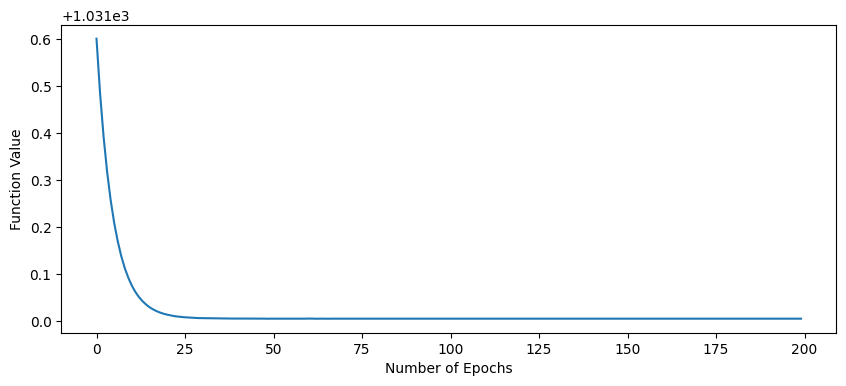

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(range(n_epochs),out_list)
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Function Value")
plt.show()

In [24]:
print(f"Analytical value of rate: {n_samples/sum(samples)}, Rate optimised using SGD: {math.exp(log_rate)}")

Analytical value of rate: 0.9694697260856628, Rate optimised using SGD: 0.9694698690966133


# Question 5
## Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. Now, create datasets of size 10, 20, 50, 100, 500, 1000, 5000, 10000. We will use a different random seed to create ten different datasets for each of these sizes. For each of these datasets, find the MLE parameters for the loc and scale using gradient descent. Plot the estimates of loc and scale as a function of the dataset size. What can you conclude? [1 mark]

In [25]:
def ll_func(samples,loc,scale):
    y = (len(samples)/2)*torch.log(2*torch.pi*(scale**2)) + (1/(2*(scale**2)))*torch.sum((samples - loc)**2)
    return y

In [26]:
n_samples_list = [10, 20, 50, 100, 500, 1000, 5000, 10000] 
seed_list = list(range(5))
est_loc_list = []
est_scale_list = []
for n_sample in n_samples_list:
    print("----------------------------------------")
    print(f"Number of samples: {n_sample}")
    loc_list = []
    scale_list = []
    for seed in seed_list:
        # generate samples from distribution
        torch.manual_seed(seed)
        norm_dist = torch.distributions.Normal(loc=2, scale=4)
        samples = norm_dist.sample((n_sample,))
        
        # Random init for loc and scale
        loc = torch.tensor(random.random(), requires_grad=True)
        scale = torch.tensor(random.random(), requires_grad=True)
        # Gradient descent loop
        n_epochs = 10000
        optimizer = torch.optim.Adam([loc,scale],lr=0.001)
        out_list = []
        for epoch_itr in range(n_epochs):
            optimizer.zero_grad()
            out = ll_func(samples,loc,scale)
            out.backward()
            optimizer.step()
            out_list.append(out.detach().numpy())
            
        loc_list.append(loc.detach().numpy())
        scale_list.append(scale.detach().numpy())
    
        print(f"From Gradient Descent, Estimated mu is:{loc.detach().numpy()} and sigma is: {scale.detach().numpy()}")
        print(f"Analytically, Estimated mu is:{sum(samples)/n_sample} and sigma is: {(sum((samples-sum(samples)/n_sample)**2)/n_sample)**0.5}")
    
    est_loc_list.append(loc_list)
    est_scale_list.append(scale_list)

----------------------------------------
Number of samples: 10


From Gradient Descent, Estimated mu is:0.9091430306434631 and sigma is: 3.516563892364502
Analytically, Estimated mu is:0.9091453552246094 and sigma is: 4.282902240753174
From Gradient Descent, Estimated mu is:1.3045934438705444 and sigma is: 2.6621177196502686
Analytically, Estimated mu is:1.3045953512191772 and sigma is: 2.7321977615356445
From Gradient Descent, Estimated mu is:1.4939571619033813 and sigma is: 2.7795143127441406
Analytically, Estimated mu is:1.4939601421356201 and sigma is: 2.8147473335266113
From Gradient Descent, Estimated mu is:2.008837938308716 and sigma is: 2.559093952178955
Analytically, Estimated mu is:2.0088624954223633 and sigma is: 3.36712908744812
From Gradient Descent, Estimated mu is:3.4090256690979004 and sigma is: 3.851982593536377
Analytically, Estimated mu is:3.4143900871276855 and sigma is: 4.521202564239502
----------------------------------------
Number of samples: 20
From Gradient Descent, Estimated mu is:3.2273199558258057 and sigma is: 1.639427

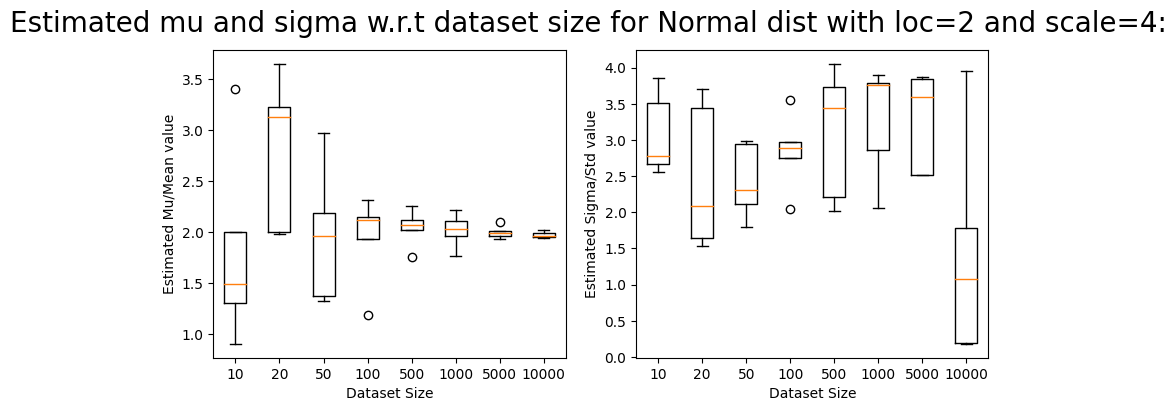

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
n_samples_list_string = list(map(str, n_samples_list))

fig.suptitle(f'Estimated mu and sigma w.r.t dataset size for Normal dist with loc=2 and scale=4:', fontsize=20)
ax[0].boxplot(est_loc_list, positions=range(len(n_samples_list)),labels=n_samples_list_string)
# ax[0].plot(n_samples_list,est_loc_list)
ax[0].set_xlabel("Dataset Size")
ax[0].set_ylabel("Estimated Mu/Mean value")
ax[1].boxplot(est_scale_list, positions=range(len(n_samples_list)),labels=n_samples_list_string)
ax[1].set_xlabel("Dataset Size")
ax[1].set_ylabel("Estimated Sigma/Std value")
plt.show()

Conclusion: We observer that:
1. Mu/Mean values get underestimated or overestimated by larger magnitude when dataset size is smaller and gets precise when dataset is larger.
2. Sigma/Standard Deviation values are underestimated but move closer to its actual values as the dataset size increases.
3. There are few outliers when estimating both Mu and Sigma. We assume that they happen due to 